In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Leer el csv
df = pd.read_csv('data/prueba.csv')
df

,EPO,W_MEAN,W_MEAN_FILT,W_STD,NUM_WALK,SMA,DYSKP,DYSKC,LEN,NUM_STEPS,...,MOTOR10,DYSK10,BRADY10,TH_LO,TH_HI,AGE,H&Y,LL,PAT,Unnamed: 28
0,1563901698000,0.0,0.0,0.0,0,0.188827,0.0,0.763158,NaN,0,...,3,0,3,8.203857,9.281521,58,1.0,96,8,NaN
1,1563901758000,0.0,0.0,0.0,0,0.177210,0.0,0.918919,NaN,0,...,3,0,3,8.203857,9.281521,58,1.0,96,8,NaN
2,1563901819000,0.0,0.0,0.0,0,0.812846,NaN,0.000000,1.087662,12,...,3,0,3,8.203857,9.281521,58,1.0,96,8,NaN
3,1563901878000,0.0,0.0,0.0,0,0.606899,NaN,0.000000,0.971560,9,...,3,0,3,8.203857,9.281521,58,1.0,96,8,NaN
4,1563901939000,0.0,0.0,0.0,0,0.929331,NaN,0.000000,1.058476,35,...,3,0,3,8.203857,9.281521,58,1.0,96,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,1564490259000,0.0,0.0,0.0,0,0.413052,0.0,0.500000,NaN,0,...,1,2,3,8.203857,9.281521,58,1.0,96,8,NaN
6512,1564490318000,0.0,0.0,0.0,0,0.487011,0.0,0.432432,NaN,0,...,1,2,3,8.203857,9.281521,58,1.0,96,8,NaN
6513,1564490379000,0.0,0.0,0.0,0,0.468960,0.0,0.105263,NaN,0,...,1,2,3,8.203857,9.281521,58,1.0,96,8,NaN
6514,1564490439000,0.0,0.0,0.0,0,0.385289,0.0,0.270270,NaN,0,...,1,2,3,8.203857,9.281521,58,1.0,96,8,NaN


In [ ]:
#Primera prueba

In [5]:
#Cuanto mas tiempo caminando TW mas numero de pasos NUM_STEPS
x = df['NUM_STEPS']
y = df['TW']

In [6]:
x

0        0
1        0
2       12
3        9
4       35
        ..
6511     0
6512     0
6513     0
6514     0
6515     0
Name: NUM_STEPS, Length: 6516, dtype: int64

In [17]:
y

0        0
1        0
2       18
3       14
4       25
        ..
6511     0
6512     0
6513     0
6514     0
6515     0
Name: TW, Length: 6516, dtype: int64

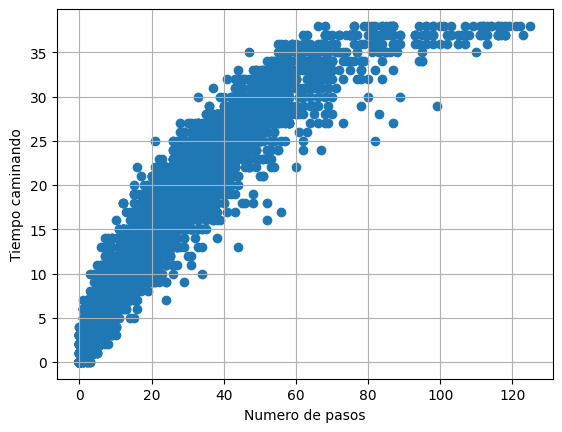

In [9]:
plt.scatter(x,y)
plt.xlabel("Numero de pasos")
plt.ylabel("Tiempo caminando")
plt.grid()
plt.show()

In [21]:
clf = LinearRegression()
x_array=x.values
x_reshaped = x_array.reshape(-1, 1)
y_array=y.values
y_reshaped = y_array.reshape(-1, 1)
clf.fit(x_reshaped,y_reshaped)
clf.coef_
clf.intercept_
clf.predict([[12]]) #18

array([[8.38437822]])

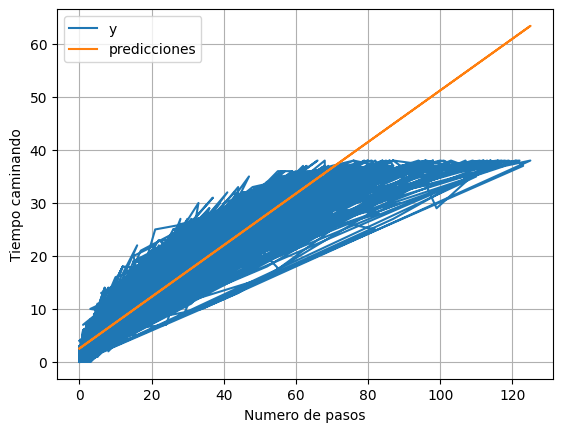

In [23]:
plt.plot(x,y)
plt.plot(x,clf.predict(x_reshaped))
plt.xlabel("Numero de pasos")
plt.ylabel("Tiempo caminando")
plt.legend(["y", "predicciones"])
plt.grid()
plt.show()

<h1>Dividir los datos en train y test</h1>

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [25]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [26]:
print(iris.data.shape)
print(iris.data)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [28]:
print(iris.target.shape)
print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
#divide los datos en entrenamiento 75% y test 25% y los barajea
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [35]:
clf = MLPClassifier()

In [38]:
clf.fit(x_train, y_train)

C:\Users\Sandra\OneDrive\Escritorio portatil\TFG\vscode\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [39]:
clf.score(x_test, y_test)

1.0

Curva ROC

Regresion logistica

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [42]:
clf = LogisticRegression()


In [ ]:
clf.fit(x_train, y_train)

In [45]:
clf.score(x_test, y_test) #Muy buenos resultados

0.9736842105263158

In [46]:
y_pred = clf.predict(x_test)

In [48]:
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)

[[11  0  0]
 [ 0 11  1]
 [ 0  0 15]]


Solo se equivocó en 1 numero de los datos que nunca habia visto (test) a partir de ser
entrenado con los datos de entrenamiento (train)


Regresión ridge se hace igual, con clf=Ridge() y luego clf.fit
LinearRegression() tambien se hace igual

In [49]:
#K vecinos más cercanos

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

In [51]:
x, y = make_classification (n_samples = 200)

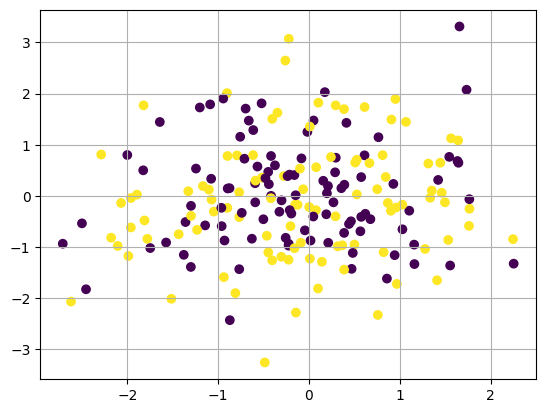

In [52]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.grid()
plt.show()

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

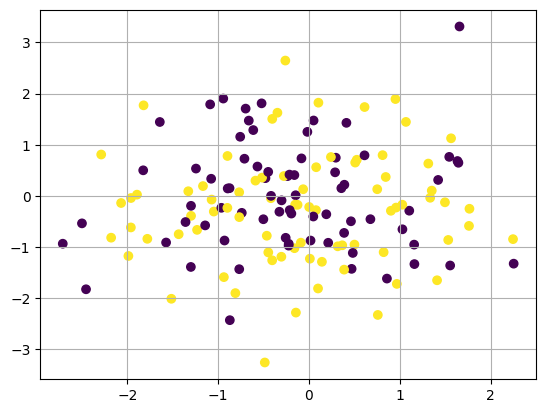

In [54]:
#grafica pero solo con los datos de entrenamiento
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.grid()
plt.show()

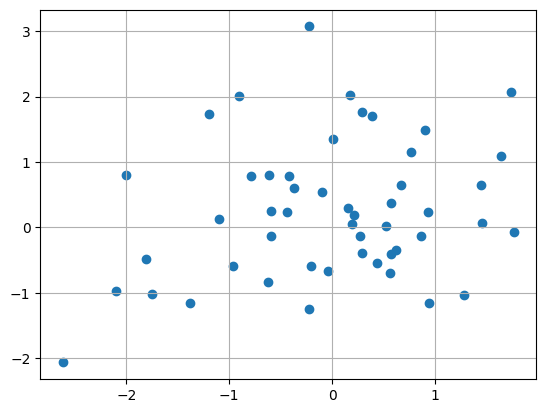

In [56]:
#grafica pero solo con los datos de test
plt.scatter(x_test[:,0], x_test[:,1])
plt.grid()
plt.show()

In [57]:
clf = KNeighborsClassifier()


In [58]:
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
clf.score(x_test, y_test)


0.78

In [63]:
y_pred = clf.predict(x_test)
print(y_pred)
#lo que el modelo predijo

[1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1
 0 1 1 1 1 0 0 1 0 1 0 1 1]


In [64]:
y_test
#la solucion real

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0])

In [66]:
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)

[[18  9]
 [ 2 21]]


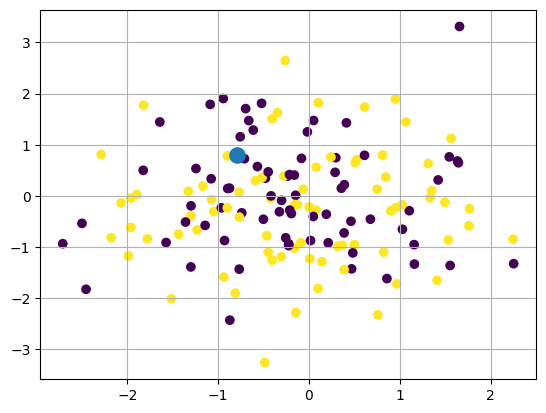

In [67]:
#vemos como funciona representando el primer dato del test sobre los datos de train
#suele fijarse en los 5 vecinos más cercanos
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.scatter(x_test[0,0], x_test[0,1], s=120)
plt.grid()
plt.show()


Regresion con K vecinos

In [68]:
#clf = KNeighborsRegressor()